# Visualize Results

## Load imports & data

In [1]:
import os
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist
# gui
import qgrid
import seaborn as sns
# pyro & pytorch
import torch
from ipywidgets import fixed, interact
from tqdm import tqdm
from scipy.io import loadmat

%matplotlib inline
qgrid.enable()

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cpu")
#torch.set_default_tensor_type('torch.cuda.FloatTensor')
#torch.cuda.is_available()

In [3]:
from cosmos.utils.utils import (view_aoi,
                   view_aoi_class_average, view_aoi_class_summary,
                   view_aoi_summary, view_glimpse, write_summary, view_feature_summary)

In [4]:
from cosmos.utils.feature_read import ReadFeatures
from cosmos.utils.aoi_reader import ReadAoi

In [43]:
dataset = "Irenecy5"
#data = ReadAoi("Irenecy5", device)
data = ReadAoi(dataset, device)

reading config.ini for Irenecy5 ... done
reading header ... done
reading drift file ... calculating cumulative drift ... done
reading aoiinfo file ... adjusting target position to frame 1 ... done
saving drift_df.csv and aoi_df.csv files ..., done
aois were read from data.pt, target.csv, and drift.csv files


In [50]:
#data = ReadFeatures("DanPol2", device)
data = ReadFeatures(data, dataset, device)

Features were read from saved files.


In [51]:
pyro.clear_param_store()
pyro.get_param_store().load(os.path.join(data.path, "runs", dataset,"features", "params"))
for attr in pyro.get_param_store().keys():
    setattr(data, "f{}".format(attr), pyro.param(attr).detach().squeeze().to(device))

In [10]:
pyro.clear_param_store()
pyro.get_param_store().load(os.path.join(data.path, "runs", dataset, "classifier/v4/K2", "params"))
for attr in pyro.get_param_store().keys():
    setattr(data, attr, pyro.param(attr).detach().squeeze().to(device))

#pyro.get_param_store().load(os.path.join(data.path, "runs/classifier/v3/K2", "params"))
#data.z_probs = pyro.param("z_probs").detach().squeeze()

In [59]:
#data.z_probs = torch.load(os.path.join(data.path, "runs/classifier/v3/K2", "z_probs.pt"))
#data.j_probs = torch.load(os.path.join(data.path, "runs/classifier/v4/K2", "j_probs.pt"))
#data.predictions = data.probs.argmax(dim=2)

# Visualize Data

## View glimpse images

In [45]:
interact(view_glimpse, frame=data.drift.index, aoi=data.target.index,
         aoi_df=fixed(data.target), drift_df=fixed(data.drift), 
         header=fixed(data.header), path_glimpse=fixed(data.path),
         selected_aoi=True, all_aois=True, label=False, offset=False)

interactive(children=(Dropdown(description='frame', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

<function cosmos.utils.utils.view_glimpse(frame, aoi, aoi_df, drift_df, header, path_glimpse, selected_aoi, all_aois, label, offset)>

In [28]:
torch.nonzero((data.probs[...,0] > 0.3) & (data.probs[...,0] < 0.7))[:,0].unique()

tensor([ 99, 176, 185, 197])

## View AoI

In [15]:
# grace aoi 180

In [47]:
#aoi_widget = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.target.index)])

#interact(view_aoi_summary, aoi=aoi_widget, data=fixed(data), show_class=True)

In [48]:
spot_picker = binary["Intervals"]["CumulativeIntervalArray"][0,0]
for sp in spot_picker:
    aoi = int(sp[-1] - 1)
    start = int(sp[1] - 1)
    end = int(sp[2])
    if sp[0] in [-2., 0., 2.]:
        data.l_probs[aoi,start:end,0] = 1
        data.l_probs[aoi,start:end,1] = 0
    elif sp[0] in [-3., 1., 3.]:
        data.l_probs[aoi,start:end,0] = 0
        data.l_probs[aoi,start:end,1] = 1

NameError: name 'binary' is not defined

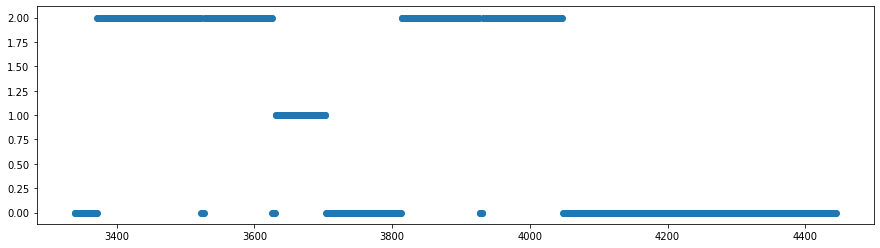

In [21]:
plt.figure(figsize=(15,4))
mask = (framelist["aoi"] == 34)
plt.scatter(framelist.loc[mask, "frame"], framelist.loc[mask, "detected"])
plt.show()

In [52]:
aoi_widget = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.target.index)])
frame_widget = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.drift.index)])
frame_widget2 = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.drift.index)], value=len(data.drift.index)-1)

interact(view_feature_summary, aoi=aoi_widget, data=fixed(data), f1=frame_widget, f2=frame_widget2,
        feature=True, binder=False, junk=False)

interactive(children=(Dropdown(description='aoi', options=((1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7,…

<function cosmos.utils.utils.view_feature_summary(aoi, data, f1, f2, feature, binder, junk)>

In [ ]:
# orange
# aoi 22
# aoi 51
# aoi 81
# aoi 221

In [9]:
# aoi 99 frame 500 (--+)
# aoi 164 frame 625 (+++) 645 (+++) 665 (+++)
# aoi 180 frame 440 (--+) 665 (--+)
# aoi 194 frame 480 (-++) 680 (--+) 
# aoi 211 frame 430 (-++) 575 (+++) 595 (+++)
# aoi 230 frame 430 (+++) 620 (+++)
# aoi 307 frame 260
# aoi 324
# grace aoi 1, 90, 99, 158, 180, 211, 230

In [37]:
frame_widget = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.drift.index)])

aoi_widget = widgets.Dropdown(options=[(j,i) for i,j in enumerate(data.target.index)])

interact(view_aoi, aoi=aoi_widget, frame=frame_widget, data=fixed(data), binder=False, junk=False)

interactive(children=(Dropdown(description='aoi', options=((1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7,…

<function cosmos.utils.utils.view_aoi(aoi, frame, data, binder, junk)>

In [30]:
aoi_list = np.unique(framelist["FL_1_1117_0OD"][:,0])

In [34]:
data.target.loc[aoi_list].index

UInt64Index([  1,   3,   9,  16,  17,  24,  28,  44,  46,  50,  71,  78,  87,
              90,  92,  93,  96,  99, 108, 120, 130, 134, 140, 162, 165, 175,
             176, 178, 192, 197, 204, 214, 215, 225, 226, 230, 241, 243, 245,
             246, 252, 265, 270, 294, 306],
            dtype='uint64', name='aoi')

In [16]:
# aoi detected frame
framelist = loadmat("/home/ordabayev/Documents/Datasets/Bayesian_test_files/B33p44a_FrameList_files.dat")
print(framelist.keys())
#aoi_list = np.unique(framelist["FL_1_1117_0OD"][:,0])
#aoi_list = [1, 2, 3, 4, 5]
OD = "FL_3339_4444_0p8OD"
frames = np.unique(framelist[OD][:,2])
framelist = pd.DataFrame(framelist[OD], columns=["aoi", "detected", "frame"])
framelist

dict_keys(['__header__', '__version__', '__globals__', 'FL_1_1117_0OD', 'FL_1118_2225_0p3OD', 'FL_2226_3338_0p6OD', 'FL_3339_4444_0p8OD', 'FL_4445_5554_1p1OD', 'FL_5555_6684_1p3OD'])


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

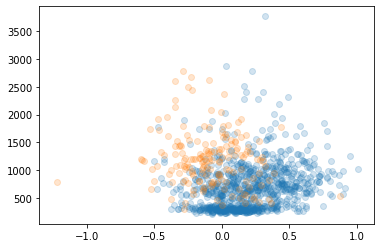

In [60]:
aoi = 0
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.x_mode[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.x_mode[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.x_mode[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.x_mode[aoi][mask], data.x_size[aoi][mask], alpha=0.2)
#plt.ylim(0,3000)
#plt.xlim(0,)
plt.show()

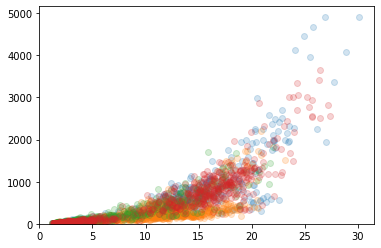

In [16]:
aoi = 229

plt.scatter(data.w_beta[aoi], data.x_size[aoi], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
plt.scatter(data.w_beta[aoi], data.x_size[aoi], alpha=0.2)

aoi = 179
plt.scatter(data.w_beta[aoi], data.x_size[aoi], alpha=0.2)


aoi = 210
plt.scatter(data.w_beta[aoi], data.x_size[aoi], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

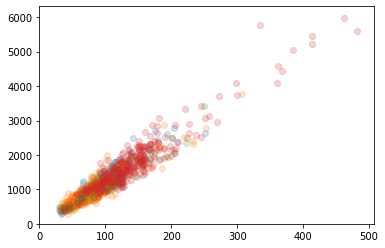

In [18]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

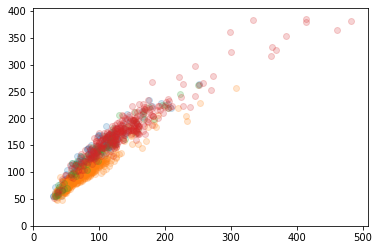

In [24]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.h_loc[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.h_loc[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.h_loc[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_beta[aoi][mask], data.h_loc[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

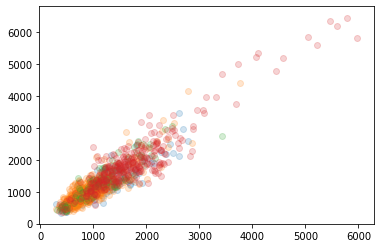

In [29]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.x_size[aoi][mask], data.y_size[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.x_size[aoi][mask], data.y_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.x_size[aoi][mask], data.y_size[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.x_size[aoi][mask], data.y_size[aoi][mask], alpha=0.2)

#plt.ylim(0,)
#plt.xlim(0,)
plt.show()

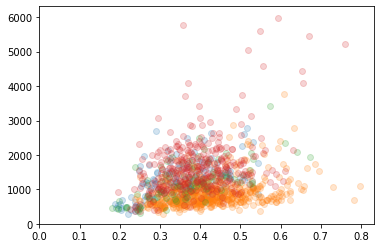

In [20]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

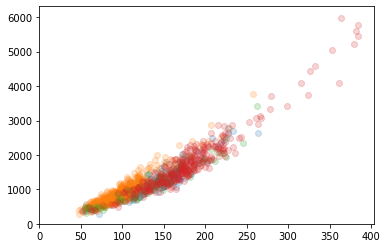

In [21]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

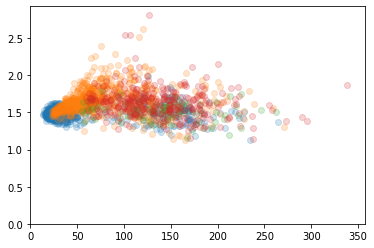

In [90]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.h_loc[aoi][mask], data.w_loc[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)


aoi = 0
mask = data.j_probs[aoi,:,1] > 0.
plt.scatter(data.jh_loc[aoi][mask], data.jw_loc[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.w_loc[aoi][mask], alpha=0.2)

aoi = 179
mask = data.j_probs[aoi,:,1] > 0.5
plt.scatter(data.jh_loc[aoi][mask], data.jw_loc[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

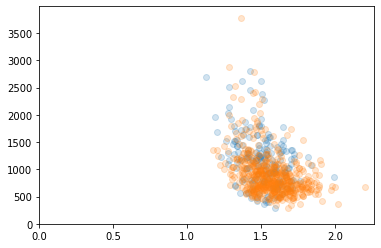

In [80]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)
#plt.scatter(data.h_beta[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.w_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)


aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.h_loc[aoi][mask], data.x_size[aoi][mask], alpha=0.2)

plt.ylim(0,)
plt.xlim(0,)
plt.show()

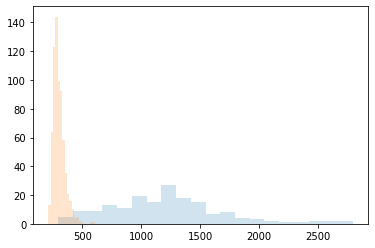

In [66]:
aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.hist(data.x_size[aoi][mask], bins=20, alpha=0.2)

mask = data.z_probs[aoi,:,1] < 0.5
plt.hist(data.x_size[aoi][mask], bins=20, alpha=0.2)
plt.show()

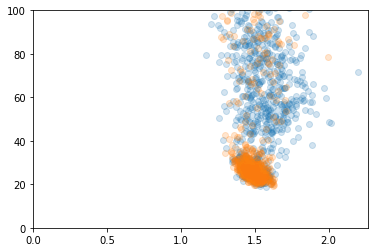

In [52]:
aoi = 0
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.w_loc[aoi][mask], data.w_beta[aoi][mask], alpha=0.2)

aoi = 229
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.w_loc[aoi][mask], data.w_beta[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.w_loc[aoi][mask], data.w_beta[aoi][mask], alpha=0.2)

aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
#plt.scatter(data.w_loc[aoi][mask], data.w_beta[aoi][mask], alpha=0.2)
plt.ylim(0,100)
plt.xlim(0,)
plt.show()

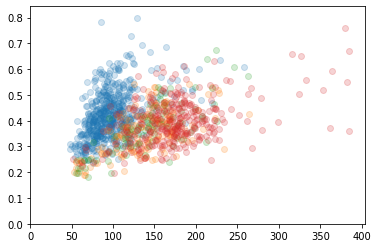

In [94]:
aoi = 0
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.h_beta[aoi][mask], alpha=0.2)

aoi = 229
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.h_beta[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.h_beta[aoi][mask], alpha=0.2)

aoi = 210
mask = data.z_probs[aoi,:,1] > 0.5
plt.scatter(data.h_loc[aoi][mask], data.h_beta[aoi][mask], alpha=0.2)
plt.ylim(0,)
plt.xlim(0,)
plt.show()

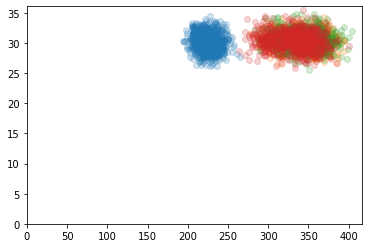

In [19]:
aoi = 0
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.b_loc[aoi][mask], data.b_beta[aoi][mask], alpha=0.2)

aoi = 229
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.b_loc[aoi][mask], data.b_beta[aoi][mask], alpha=0.2)

aoi = 179
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.b_loc[aoi][mask], data.b_beta[aoi][mask], alpha=0.2)

aoi = 210
mask = data.z_probs[aoi,:,1] > 0.
plt.scatter(data.b_loc[aoi][mask], data.b_beta[aoi][mask], alpha=0.2)
plt.ylim(0,)
plt.xlim(0,)
plt.show()

In [ ]:
# h_loc ~ h_beta ~ x_size ~ w_beta
# global_b_beta

In [22]:
torch.nonzero((data.j_probs[:,:,1] > 0.5) & (data.z_probs[:,:,1] > 0.5))[300:315]

tensor([[ 55, 661],
        [ 56,  20],
        [ 56, 237],
        [ 56, 730],
        [ 57, 281],
        [ 57, 282],
        [ 57, 286],
        [ 57, 289],
        [ 57, 295],
        [ 57, 296],
        [ 57, 300],
        [ 57, 302],
        [ 57, 307],
        [ 57, 308],
        [ 57, 309]])

In [ ]:
# dan-pol2 aoi 96 frame 364 430
# aoi 78 frame 500 515
# aoi 180 frame 500

# Modelv1

In [7]:
from scipy.io import loadmat

binary = loadmat("/home/ordabayev/Documents/Datasets/Dan-green-Pol2/b1p139_DNALocations_GreenPolII_BinarySpots.mat")
binary["Intervals"].dtype.names

('AllTracesCellArrayDescription',
 'AllTracesCellArray',
 'CumulativeIntervalArrayDescription',
 'CumulativeIntervalArray',
 'AllSpots')

In [8]:
binary["Intervals"]["CumulativeIntervalArrayDescription"]

array([[array(['(low or high =-2,0,2 or -3,1,3) (frame start) (frame end) (delta frames) (delta time (sec)) (interval ave intensity) AOI#'],
      dtype='<U121')]], dtype=object)

In [56]:
sp = binary["Intervals"]["CumulativeIntervalArray"][0,0][binary["Intervals"]["CumulativeIntervalArray"][0,0][:,-1] == 181, :3]
sp

array([[-2.000e+00,  1.000e+00,  4.800e+01],
       [ 1.000e+00,  4.900e+01,  4.900e+01],
       [ 0.000e+00,  5.000e+01,  1.170e+02],
       [ 1.000e+00,  1.180e+02,  1.320e+02],
       [ 0.000e+00,  1.330e+02,  3.670e+02],
       [ 1.000e+00,  3.680e+02,  3.680e+02],
       [ 0.000e+00,  3.690e+02,  5.560e+02],
       [ 1.000e+00,  5.570e+02,  5.580e+02],
       [ 0.000e+00,  5.590e+02,  5.980e+02],
       [ 1.000e+00,  5.990e+02,  6.380e+02],
       [ 0.000e+00,  6.390e+02,  7.470e+02],
       [ 1.000e+00,  7.480e+02,  7.500e+02],
       [ 0.000e+00,  7.510e+02,  7.630e+02],
       [ 1.000e+00,  7.640e+02,  7.640e+02],
       [ 0.000e+00,  7.650e+02,  9.800e+02],
       [ 1.000e+00,  9.810e+02,  1.031e+03],
       [ 2.000e+00,  1.032e+03,  1.061e+03]])

In [40]:
from torch.distributions.transforms import AffineTransform, SigmoidTransform

def lognormal(loc, scale):
    base_distribution = dist.Normal(loc, scale)
    transforms = [SigmoidTransform(),]
    logistic = dist.TransformedDistribution(base_distribution, transforms)
    return logistic

In [150]:
def hpd(trace, mass_frac) :
    """
    Returns highest probability density region given by
    a set of samples.

    Parameters
    ----------
    trace : array
        1D array of MCMC samples for a single variable
    mass_frac : float with 0 < mass_frac <= 1
        The fraction of the probability to be included in
        the HPD.  For example, `massfrac` = 0.95 gives a
        95% HPD.
        
    Returns
    -------
    output : array, shape (2,)
        The bounds of the HPD
    """
    # Get sorted list
    d = np.sort(np.copy(trace), axis=0)
    #print(d)

    # Number of total samples taken
    n = len(trace)
    print(n)
    
    # Get number of samples that should be included in HPD
    n_samples = np.floor(mass_frac * n).astype(int)
    print(n_samples)
    
    # Get width (in units of data) of all intervals with n_samples samples
    int_width = d[n_samples:] - d[:n-n_samples]
    
    # Pick out minimal interval
    min_int = np.argmin(int_width, axis=0)
    print(min_int)
    
    # Return interval
    return np.array([d[min_int, np.arange(3)], d[min_int+n_samples, np.arange(3)]])

In [157]:
dn = dist.Normal(torch.tensor([0., 1., 3.]),0.01)
x = dn.sample((2000,))

In [158]:
x.shape

torch.Size([2000, 3])

In [162]:
hpd1, hpd2 = hpd(x, 0.95)

2000
1900
[56 42 65]


In [163]:
hpd1.shape

(3,)

In [ ]:
# Compute HPD credible regions
hpds = 4*[None]
modes = np.empty(4)
for i in range(4):
    hpds[i] = hpd(sampler[i].flatchain[:,0], 0.95)
    modes[i] = sampler[i].flatchain[np.argmax(sampler[i].flatlnprobability)]

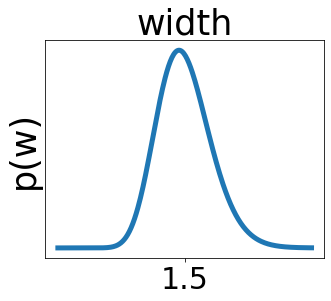

In [8]:
d = dist.Gamma(1.50 * 15, 15)
x = torch.arange(0.01,3.,0.01)

plt.figure(figsize=(5,4))
plt.plot(x, torch.exp(d.log_prob(x)).cpu(), color="C0", lw=5)

plt.gca().axes.get_xaxis().set_ticks([1.5])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xticks(size=30)
plt.title("width", fontsize=35)
plt.ylabel("p(w)", fontsize=35)
plt.show()

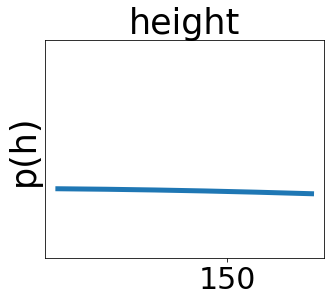

In [22]:
#d = dist.Gamma(150 * 1, 1)
d = dist.HalfNormal(500)
x = torch.arange(50,200.,0.1)

plt.figure(figsize=(5,4))
plt.plot(x, torch.exp(d.log_prob(x)).cpu(), color="C0", lw=5)

plt.gca().axes.get_xaxis().set_ticks([150])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xticks(size=30)
plt.title("height", fontsize=35)
plt.ylabel("p(h)", fontsize=35)
plt.ylim(0,0.005)
plt.show()

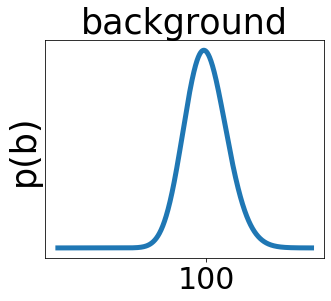

In [12]:
d = dist.Gamma(100 * 1, 1)
x = torch.arange(30,150.,0.1)

plt.figure(figsize=(5,4))
plt.plot(x, torch.exp(d.log_prob(x)).cpu(), color="C0", lw=5)

plt.gca().axes.get_xaxis().set_ticks([100])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xticks(size=30)
plt.title("background", fontsize=35)
plt.ylabel("p(b)", fontsize=35)
plt.show()

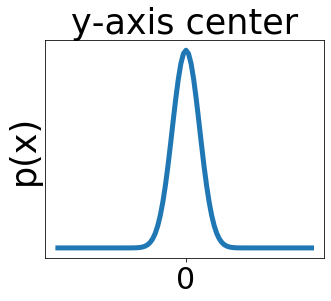

In [10]:
d = dist.Beta(45, 45)
x = torch.arange(0,1.,0.01)

plt.figure(figsize=(5,4))
plt.plot(x-0.5, torch.exp(d.log_prob(x)).cpu(), color="C0", lw=5)

plt.gca().axes.get_xaxis().set_ticks([0.])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xticks(size=30)
plt.title("y-axis center", fontsize=35)
plt.ylabel("p(x)", fontsize=35)
plt.show()

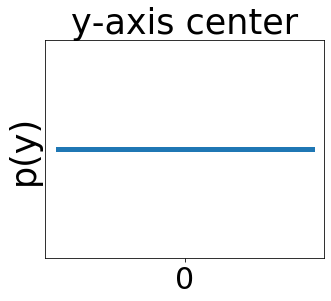

In [24]:
d = dist.Beta(1, 1)
x = torch.arange(0,1.,0.01)

plt.figure(figsize=(5,4))
plt.plot(x-0.5, torch.exp(d.log_prob(x)).cpu(), color="C0", lw=5)

plt.gca().axes.get_xaxis().set_ticks([0.])
plt.gca().axes.get_yaxis().set_ticks([])
plt.xticks(size=30)
plt.title("y-axis center", fontsize=35)
plt.ylabel("p(y)", fontsize=35)
plt.show()

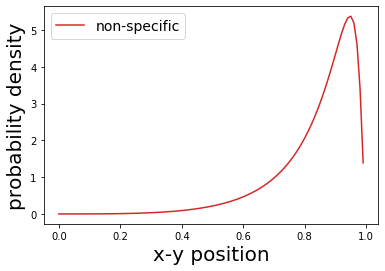

In [50]:
d = dist.Normal(0.5, 0.1)
d2 = lognormal(2., 1.)
d3 = dist.Normal(0., 1.)
d4 = dist.Uniform(-7.5, 7.5)
x = torch.arange(0.,1.,0.01)
y = torch.arange(-5,5,0.1)
#plt.plot(x, torch.exp(d.log_prob(x)).cpu(), color="C1", label="binder")
plt.plot(x, torch.exp(d2.log_prob(x)).cpu(), color="C3", label="non-specific")
#plt.plot(y.cpu(), torch.exp(d3.log_prob(y)).cpu(), label="norm")
#plt.plot(x.cpu(), torch.exp(d4.log_prob(x)).cpu(), label="u7.5")
#plt.ylim(0,0.05)
plt.legend(fontsize=14)
plt.xlabel("x-y position", fontsize=20)
plt.ylabel("probability density", fontsize=20)
plt.show()

## Mathematical model
Product rule
$$ p(X,Z,\theta) = p(X|Z,\theta)p(Z|\theta)p(\theta) = p(Z|\theta,X)p(\theta|X)p(X) $$

Bayes rule
$$ p(Z|\theta,X)p(\theta|X) = \dfrac{p(X|Z,\theta)p(Z|\theta)p(\theta)}{p(X)} $$

$$ p(Z|\pi,X)p(\mu|X)p(\eta|X)p(\pi|X) = \dfrac{p(X|Z,\mu,\eta)p(Z|\pi)p(\mu)p(\eta)p(\pi)}{p(X)} $$

Likelihood
$$ p(X|Z,\mu,\eta) = \prod_f p(X_f|Z_f,\mu,\eta) = \prod_f \prod_{ij} p(X_{fij}|Z_f,\mu,\eta) = \prod_f \prod_{ij} Noise(X_{fij}|Z_f,\mu,\eta) $$

where $\mu$ is a spot model
$$ \mu(height_k,width_k,x_k,y_k,background) $$

Prior
$$ p(Z|\theta) = \prod_f p(Z_f|\theta) = \prod_f Categorical(Z_f|\pi) = \prod_f \prod_k \pi_k^{Z_{fk}} $$

Posterior
$$ p(\theta|X) $$

$$ p(Z|X,\theta) = \prod_f p(Z_f|X_f,\theta) $$

where
$$ \theta = \mu \cup \eta \cup \pi $$

$$ p(x,z,\mu,\sigma, \pi) = p(x|z,\mu,\sigma)p(z|\pi)p(\mu)p(\sigma)p(\pi) $$

$$ \prod_n \prod_f p(x_{nf}|z_{nf},\mu_{nf},\sigma)p(z_{nf}|\pi)p(\mu_{nf})p(\sigma)p(\pi) $$

$$ p(x|z,\mu,\sigma) = \prod_n \prod_f p(x_{nf}|\mu_{nf}[z_f],\sigma) $$

$$ p(z|\pi) = \prod_n \prod_f \pi[z_{nf}] $$

### Spot model
$$ \mu_{fij}(Z_f,height_k,width_k,x_k,y_k,background) $$

$$ p(\mu|X) \simeq q(background) \prod_k q(height_k) q(width_k) q(x_k) q(y_k) $$

$$ q(height_k) = Normal(height\_loc_k, height\_scale_k) $$

$$ q(background) = Normal(background\_loc, background\_scale) $$

$$ q(width_k) = Delta(w_k) $$

$$ q(x_k) = Delta(x_k) $$

$$ q(y_k) = Delta(y_k) $$

### Noise model (Likelihood)

$$ p(X_{fij}|Z_f,\mu,\eta) = Gamma(X_{fij}-offset|\alpha_{fij}, \beta_{fij})Delta(offset) $$
where
$$ \alpha_{fij} = \dfrac{\mu_{fij}(Z_f,\theta)}{gain}; \beta_{fij} = \dfrac{1}{gain} $$

$$ \eta = \{gain, offset\} $$

$$ p(\eta|X) \simeq q(gain) q(offset) = Delta(g)Delta(o) $$

### Classification

$$ p(\pi|X) = q(\pi) =  Dirichlet(\rho_1,...,\rho_K) $$


$$ p(Z_f|X_f,\pi) = q(Z_f) = Categorical(Z_f|z\_prob_f) = \prod_k z\_prob_{fk}^{Z_{fk}} $$